In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset-train-test/Titanic_train.csv
/kaggle/input/titanic-dataset-train-test/Titanic_test.csv
/kaggle/input/titanic-survived/Titanic_test_Suvived.csv


# 1. Importing Libraries

The first step is to import needed libraries for the project

In [3]:
# Data wrangling
from pandas import DataFrame
import pandas as pd
import numpy as np

#View missing data 
import missingno

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# library for automatic EDA
import pandas_profiling 

# Data normalization
from sklearn import preprocessing


In [4]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Compute model effiency 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 

In [5]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Classifier model
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.metrics import silhouette_score

# 2. Data Preprocessing


The primary objective of **data preprocessing** is to transform raw data into a structured form that can be analyzed with ease and accuracy. Given that raw data may contain inaccuracies, inconsistencies, and extraneous information, it is essential to preprocess the data to remove any noise and irrelevant factors. By doing so, the data becomes more dependable, consistent, and valuable for developing precise models.
    

In [6]:
#Importing  and reading the CSV files located at a designated file directory within the Kaggle platform.
train = pd.read_csv('/kaggle/input/titanic-dataset-train-test/Titanic_train.csv')
test = pd.read_csv('/kaggle/input/titanic-dataset-train-test/Titanic_test.csv')

**DETAILS ON FEATURES OF THE TITANIC DATASET:**

- **Survived:** 0 = Did not survive, 1 = Survived

- **Pclass:** 1 = First class, 2 = Second class, 3 = Third class. [Ticket class shows socio-economic status.]

- **Sex:** Male or female

- **Age:** Age in years

- **SibSp:** Number of siblings or spouses aboard the titanic

- **Parch:** Number of parents or children aboard the titanic

- **Ticket:** Passenger ticket number

- **Fare:** Passenger fare

- **Cabin:** Cabin number

- **Embarked:** Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton

In [7]:
#'train.head' is a function method in the Pandas library.This function returns the first n rows of the dataframe [default n=5]
print("TRAIN CSV DATA :\n",train.head())
print("\nTEST CSV DATA :\n",test.head())

TRAIN CSV DATA :
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500  

In [8]:
#'tail()' this function returns the last n rows of the dataframe [default n=5]
print("TRAIN CSV DATA  :\n\n",train.tail())
print("\n\nTEST CSV DATA  :\n",test.tail())

TRAIN CSV DATA  :

      PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q  


TEST CSV DATA  :
      PassengerId  Pclass                          Name     Sex   Age  S

In [9]:
# describe() provides summary statistics(datset description) for the numerical columns of a DataFrame, 
#such as the mean, standard deviation, and quartiles.
# It is useful for understanding the distribution and range of values.
print(test.describe()) 

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


In [10]:
# info() provides a concise summary of a DataFrame, including # of non-null values,data types of each column, and memory usage.
# It is useful for quickly inspecting the structure of a DataFrame and identifying missing or null values
print(train.info())
print(test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [11]:
print("ROWS AND COLUMNS IN TITANIC TRAIN DATASET:", train.shape)
print("COLUMN NAMES IN TITANIC TRAIN DATASET: ", train.columns)

print("\n\nROWS AND COLUMNS IN TITANIC TEST DATASET:", test.shape)
print("COLUMN NAMES IN TITANIC TEST DATASET: ", test.columns)


ROWS AND COLUMNS IN TITANIC TRAIN DATASET: (891, 12)
COLUMN NAMES IN TITANIC TRAIN DATASET:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


ROWS AND COLUMNS IN TITANIC TEST DATASET: (418, 11)
COLUMN NAMES IN TITANIC TEST DATASET:  Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


A significant distinction between the "train" and "test" datasets is that the "test" dataset lacks one column compared to the "train" dataset. Specifically, the "Survived" column, which represents the target variable, is absent in the "test" dataset. This is done to utilize our analysis of the "train" dataset to forecast the survival of passengers in the "test" dataset. Our objective is to design a forecasting model utilizing the "train" data that can be employed on the "test" data to make precise predictions about passenger survival.

# 3. Data Cleaning

**Data cleaning** refers to the process of detecting and correcting or removing inaccuracies, incongruities, and discrepancies in a data set. The objective of data cleaning is to enhance the data's quality for research or modeling purposes. This may involve addressing missing data, correcting typographical or spelling errors, eliminating redundant or irrelevant data, transforming data types, standardizing values or units, and handling anomalies or aberrations. Therefore it is a crucial step in data preprocessing, as it guarantees that the data is accurate, complete, and consistent, thereby enhancing the dependability and credibility of any insights or predictions derived from it.



# 3.1 Detecting missing values

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

<AxesSubplot:>

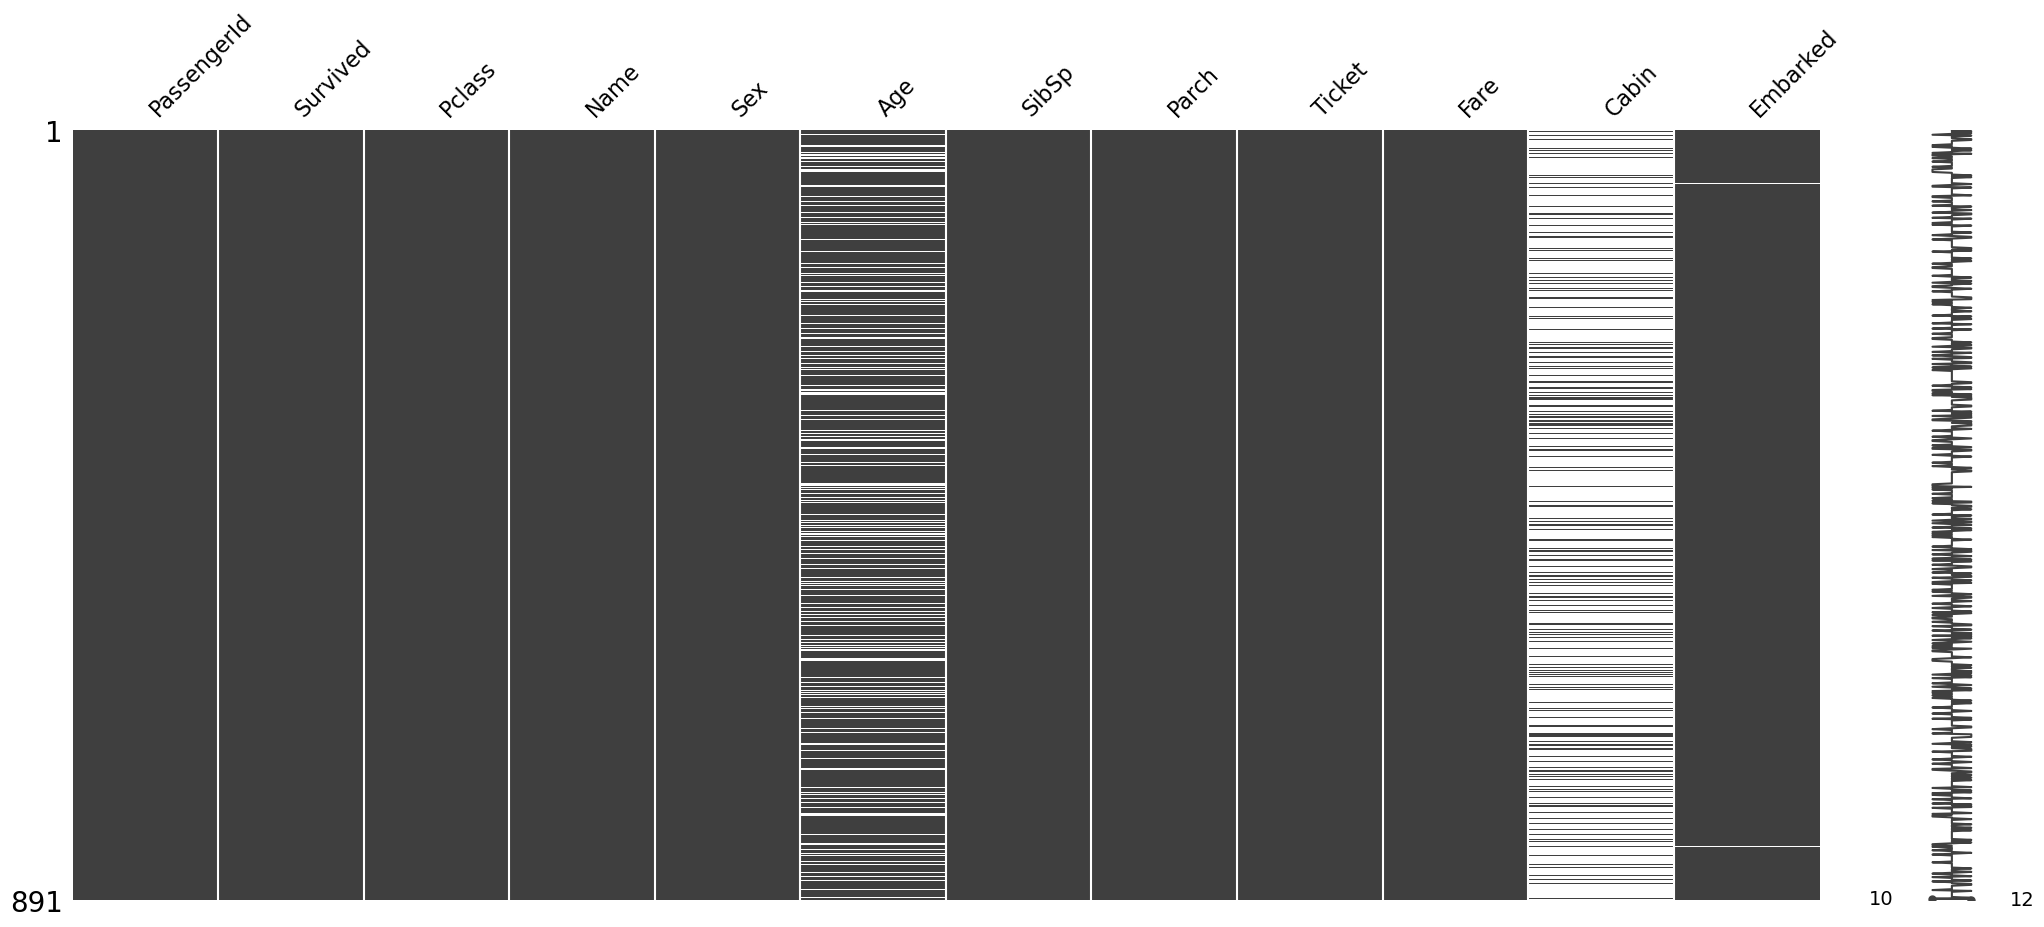

In [12]:
# Missing values representation in pandas **NaN (not a number)**
#TRAIN DATSET MISSING VALUES

print(train.isnull()) #False-- value is not null; True -- value is null.

#'isnull()' and 'sum()' methods used to count the number of missing values or NaNs (Not a Number) in each column
print("\nSUM OF NULL VALUES IN TITANIC TRAIN DATA: \n\n", train.isnull().sum())

# Missing data in train set 
missingno.matrix(train)

In [13]:
#TEST DATSET MISSING VALUES

print(test.isnull()) # False -- value is not null; True -- value is null.

#used to count the number of missing values or NaNs (Not a Number) in each column
print("\nSUM OF NULL VALUES IN TITANIC TEST DATA: \n\n", test.isnull().sum())

# Missing data in test set 
missingno.matrix(test)

     PassengerId  Pclass   Name    Sex    Age  SibSp  Parch  Ticket   Fare  \
0          False   False  False  False  False  False  False   False  False   
1          False   False  False  False  False  False  False   False  False   
2          False   False  False  False  False  False  False   False  False   
3          False   False  False  False  False  False  False   False  False   
4          False   False  False  False  False  False  False   False  False   
..           ...     ...    ...    ...    ...    ...    ...     ...    ...   
413        False   False  False  False   True  False  False   False  False   
414        False   False  False  False  False  False  False   False  False   
415        False   False  False  False  False  False  False   False  False   
416        False   False  False  False   True  False  False   False  False   
417        False   False  False  False   True  False  False   False  False   

     Cabin  Embarked  
0     True     False  
1     True     Fa

<AxesSubplot:>

* Age, Cabin and Embarked colummns in the **Titanic Training Dataset** have missing data 
* Age, Fare and Cabin in the **Titanic Test Dataset** have missing data.

# 3.2 Handling Missing Data

While dealing with  missing data in data analysis care must be taken as it can affect the accuracy and validity of the results.
There are two main ways to handle missing values in a dataset:


**1. Delete Row/Column**- Get rid of rows or columns with nulls

**2. Replace with Mean/Median/Mode** - Replace nulls with non-null values


**3.2.1 Delete Column in Test and Train Data**

In [14]:
#dropping ticket and cabin column
train = train.drop(['Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)

#axis=0 -- deleting row; axis=1 -- deleting column

* As Cabin column has more than 70% missing data, it is better to remove columns with a high percentage of missing data, as it can affect the accuracy and reliability of the model.
* Removing the Ticket column to remove features to help reduce the complexity of the model and prevent overfitting.

**3.2.2 Replace with Mean/Median/Mode**

In [15]:
# Fill missing value in Age with median
train['Age'].fillna(train['Age'].median(),inplace=True)
test['Age'].fillna(test['Age'].median(),inplace=True)

In [16]:
# Compute the most frequent value of Embarked in train set
mode = train['Embarked'].dropna().mode()[0]
print("The mode of Embarked in train dataset is :",mode)

# Fill missing value in Embarked with mode
train['Embarked'].fillna(mode, inplace = True)

The mode of Embarked in train dataset is : S


In [17]:
# Compute median of Fare in test set 
median = test['Fare'].dropna().median()
print("The median of Fare in test dataset is :",median)

# Fill missing value in Fare with median
test['Fare'].fillna(median, inplace = True)


The median of Fare in test dataset is : 14.4542


In [18]:
#'isnull()' and 'sum()' methods used to count the number of missing values or NaNs (Not a Number) in each column
print("\nSUM OF NULL VALUES IN TITANIC TRAIN DATA: \n\n", train.isnull().sum())
print("\nSUM OF NULL VALUES IN TITANIC TEST DATA: \n", test.isnull().sum())




SUM OF NULL VALUES IN TITANIC TRAIN DATA: 

 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

SUM OF NULL VALUES IN TITANIC TEST DATA: 
 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


# 4. Data normalisation

The purpose of normalization is to make sure that the parameters of attributes are similar so that there is  no conflict with the model-training. Normalization is a crucial preliminary measure for numerous machine learning techniques.

Here, it involves converting the features from **categorical to numerical values** for the purpose of training the model.

In [19]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch     Fare Embarked  
0  34.5      0      0   7.8292        Q  
1  47.0      1      0   7.0000        S  
2  62.0      0      0   9.6875        Q  
3  27.0      0      0   8.6625        S  
4  22.0      1      1  12.2875        S

We are going to select the features - **'Sex'** and **'Embarked'** for data normalization since it defined as categorical values in the Titanic dataset.
Converting categorical data to numerical data.

**Sex**-- 1 - Female; 0 - Male
**Embarked**-- C - 0; Q - 1; S - 2

In [20]:
le = preprocessing.LabelEncoder()

# Select categorical columns from data
cols = ["Sex", "Embarked"] 


#loop along with method used on datasets to fit the encoder and transform the values
for col in cols:
    train[col]= le.fit_transform(train[col]) #Encode categorical data
    test[col]= le.transform(test[col])
    
    #printed colum which returns the unique classes(encoded)
    print(le.classes_) 
   


['female' 'male']
['C' 'Q' 'S']


In [21]:
test.head()

PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    1   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2          894       2                     Myles, Mr. Thomas Francis    1   
3          895       3                              Wirz, Mr. Albert    1   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   

    Age  SibSp  Parch     Fare  Embarked  
0  34.5      0      0   7.8292         1  
1  47.0      1      0   7.0000         2  
2  62.0      0      0   9.6875         1  
3  27.0      0      0   8.6625         2  
4  22.0      1      1  12.2875         2

# 5. Data visualisation

* Data and information are graphically represented in data visualization. 
* It entails making visual objects such as charts, graphs, and maps that convey information and ideas in an understandable and visually appealing manner.
* It enables us to comprehend complex data sets more swiftly and easily. 
* By displaying data, we can spot patterns, trends, and anomalies that conventional data analysis techniques might struggle to detect.

**Visualization of the dataset**

In [22]:
# Standarizing the color scheme throughout the Data Visualization in the project
colors = ["#0072B2","#006D2C","#6BBAA7","#74C476"]


Text(0, 0.5, 'Count')

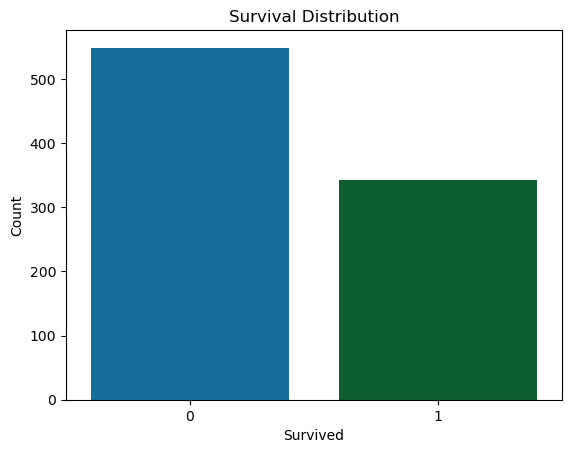

In [23]:
#Survival Distribution
sns.countplot(x="Survived",data=train,palette=colors)
plt.title('Survival Distribution')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

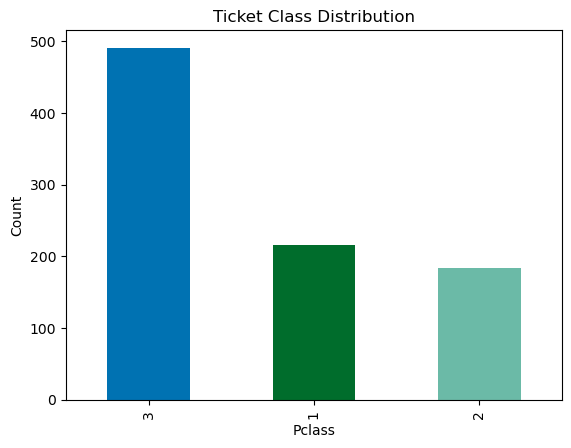

In [24]:
# Ticket Class Distribution
colors = ["#0072B2","#006D2C","#6BBAA7"]
train['Pclass'].value_counts(normalize=False).plot(kind='bar',color = colors)
plt.title('Ticket Class Distribution') #- socio-economic status
plt.xlabel('Pclass')
plt.ylabel('Count')

In [25]:
# Gender Distribution
# train['Sex'].value_counts(normalize=True).plot(kind='bar')
values = train['Sex'].value_counts(normalize=True)
labels = ['0 - Male', '1 - Female']
plt.title('Gender Distribution-Sex')
color = ["#006D2C","#74C476"]
#plt.pie(values, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
plt.pie(values, labels=labels,  autopct='%1.1f%%', startangle=90, colors=color)

# plt.pie(values, labels=labels)
plt.axis('equal')
plt.show()


In [26]:
# number of Siblings/Spouses Distribution
train['SibSp'].value_counts(normalize=False).plot(kind='bar',color=colors) 
plt.title('Number of Siblings/Spouses Distribution')
plt.xlabel('Sibling/Spouse Count')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

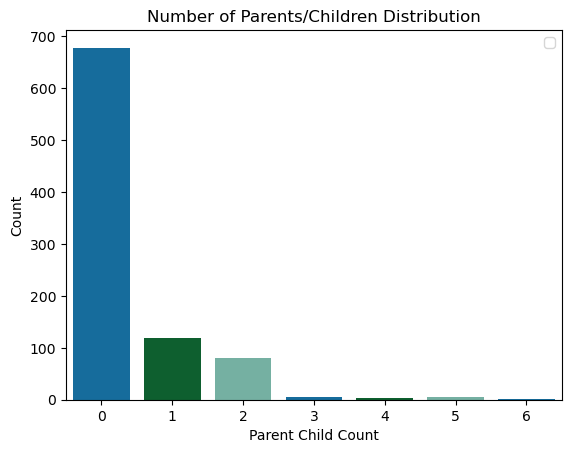

In [27]:
# number of parent child count
sns.countplot(x='Parch',data=train, palette=colors)
plt.title('Number of Parents/Children Distribution')
plt.xlabel('Parent Child Count')
plt.ylabel('Count')
plt.legend(loc = 'best')

In [28]:
# age distribution using histplot
sns.histplot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()), color=colors[1])
plt.legend(loc = 'best')
plt.title('Age Distribution')
plt.xlabel('Age Range')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

In [29]:
# age distribution using distplot
sns.distplot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()), color=colors[0])
plt.legend(loc = 'best')
plt.title('Age Distribution')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


Text(0.5, 1.0, 'Age Distribution')

Text(0, 0.5, 'Frequency')

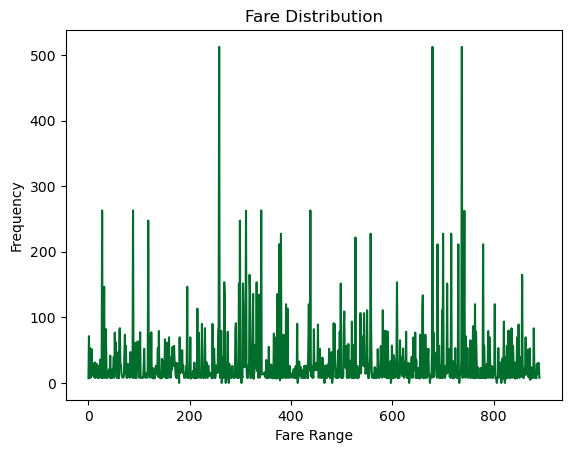

In [30]:
# fare distribution
train['Fare'].plot(kind='line',color='#006D2C')
plt.title('Fare Distribution')
plt.xlabel('Fare Range')
plt.ylabel('Frequency')

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.7/site-packages/seabor

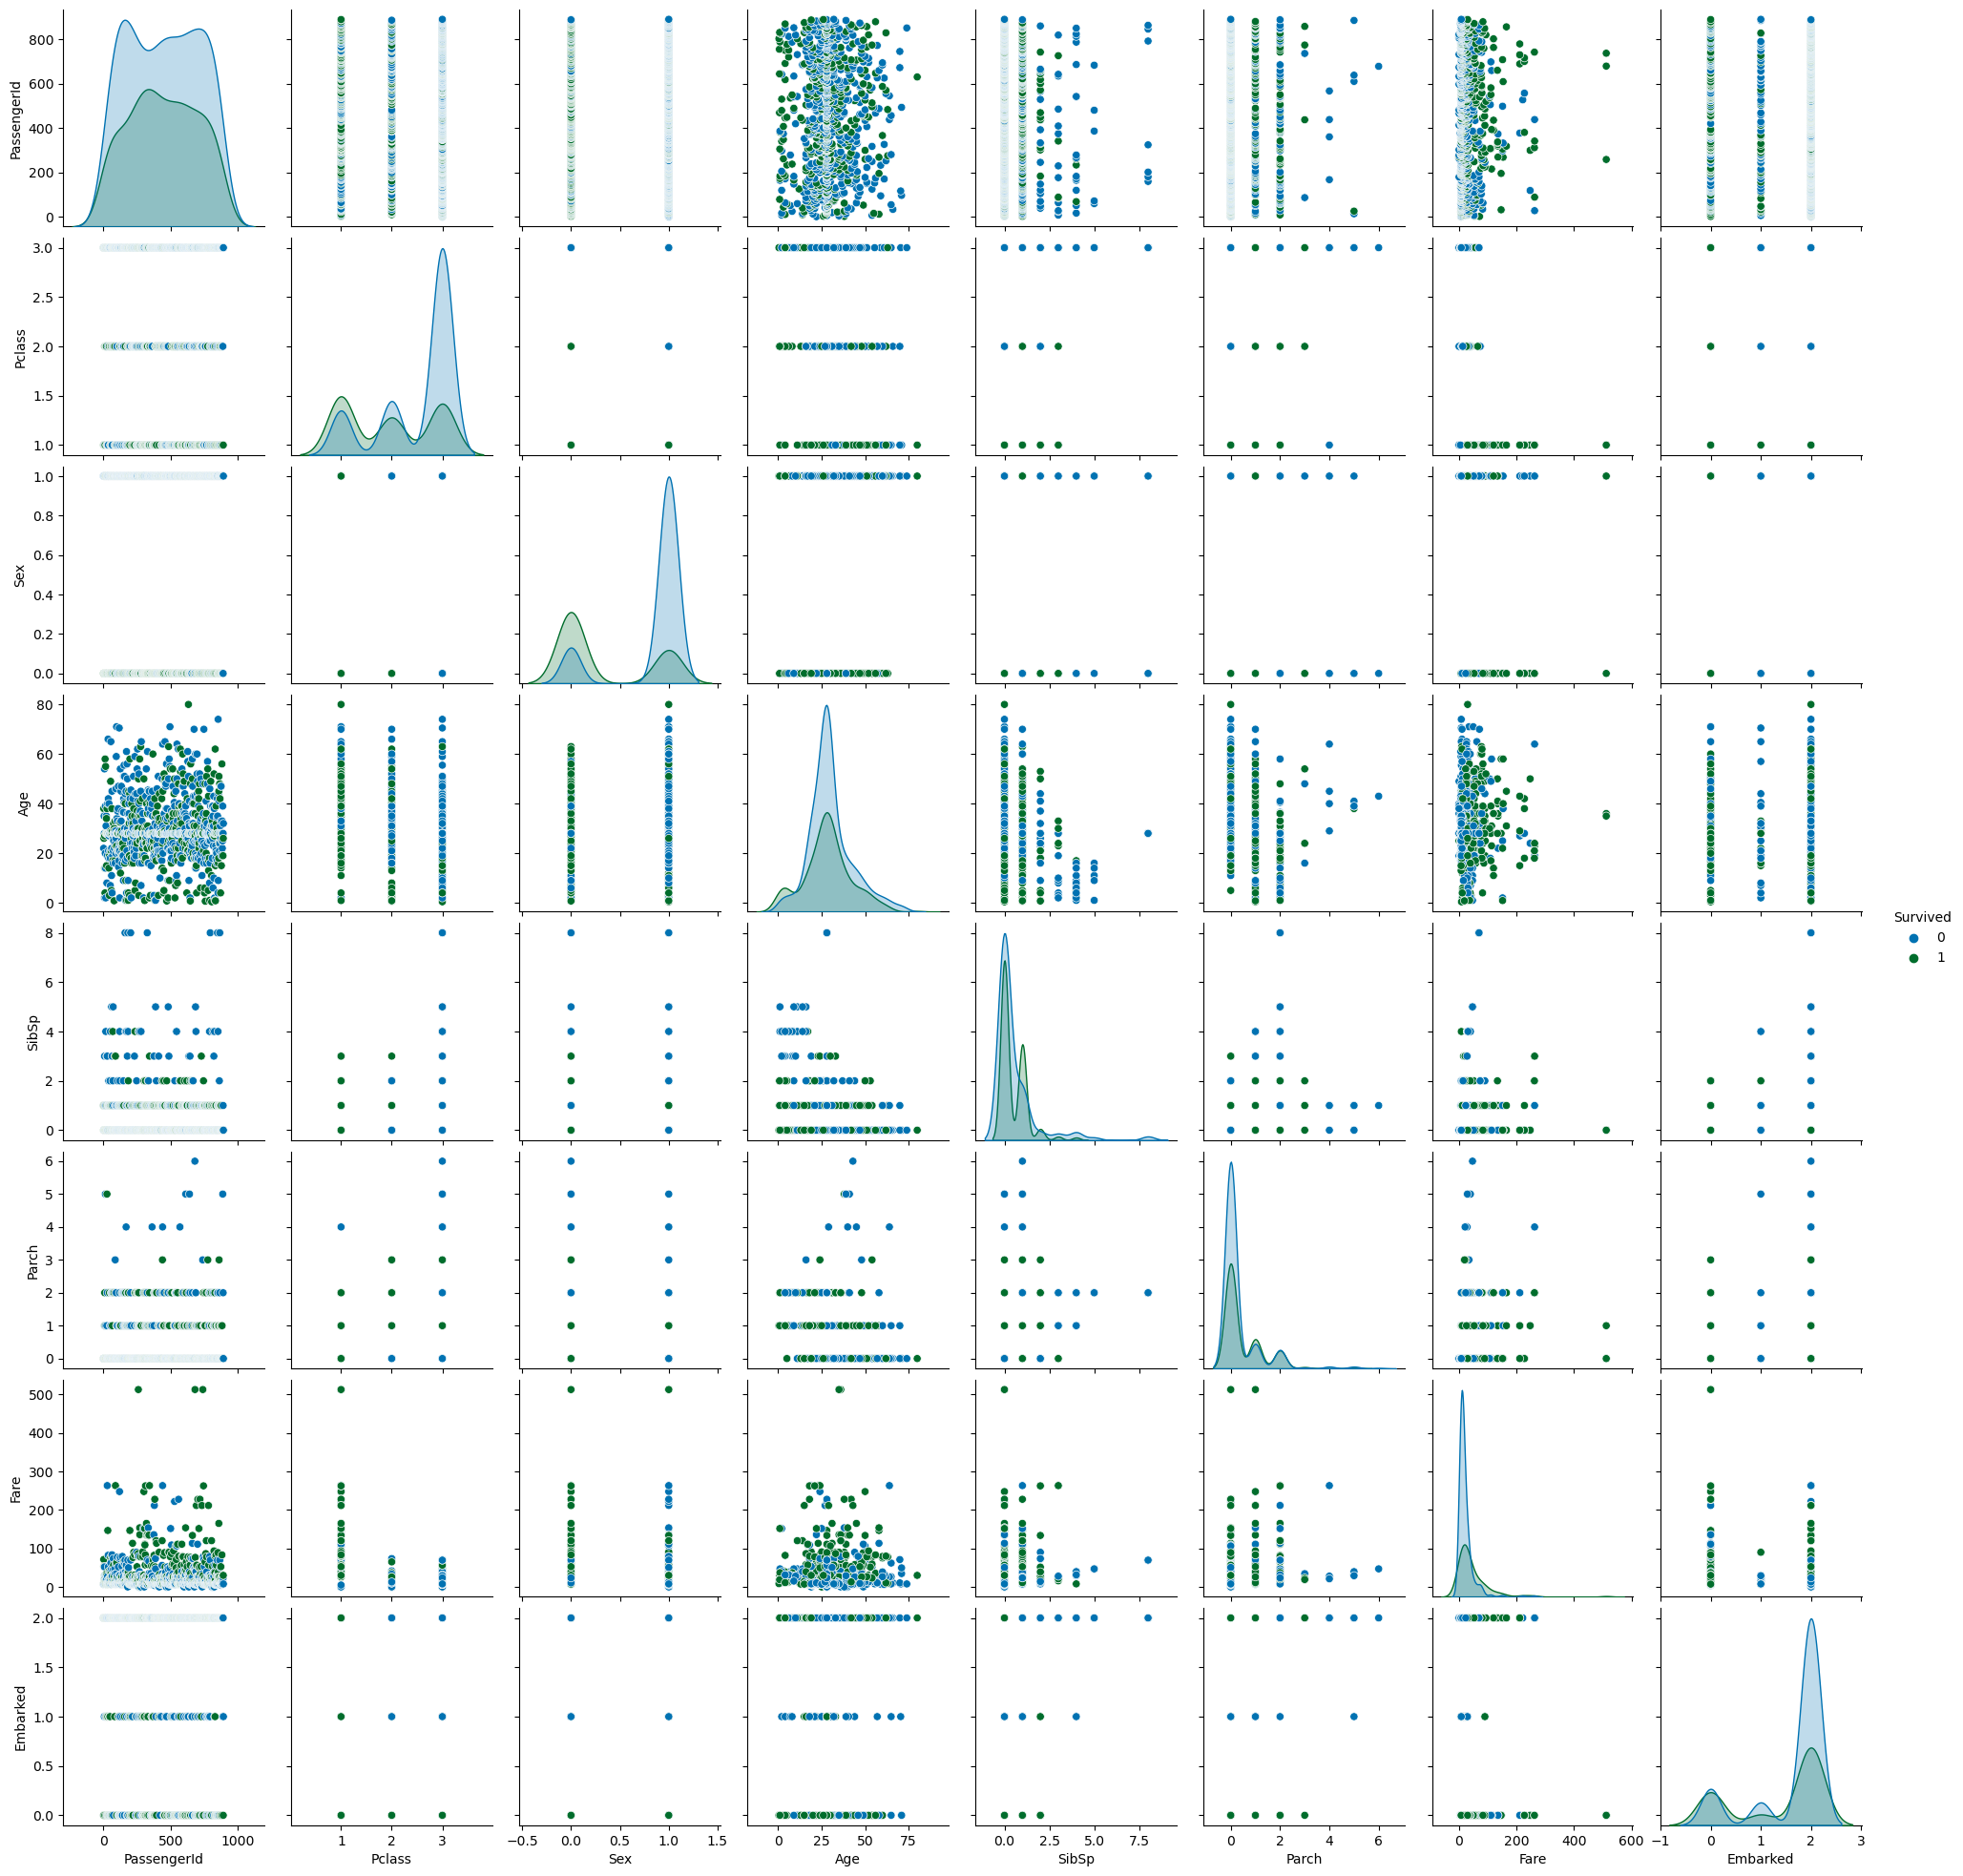

In [31]:
# Visualize the whole features in dataset using pairplot
sns.pairplot(train, hue='Survived',palette=colors)

In [32]:
report = pandas_profiling.ProfileReport(train)

# Let's now visualize the report generated by pandas_profiling.
display(report)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [33]:
report = pandas_profiling.ProfileReport(test)

# Let's now visualize the report generated by pandas_profiling.
display(report)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 6. Data Analysis

**Tools and Methods used :** 
1. Here we are **importing seaborn,matplot libraries** and using kdeplot,barplot,bar charts,correlation map to visualize summerize data 
2. Pivot table to do the analysis for survival rate based on different categories and their conclusions.

**6.1 Using Libraries visualize Dataset**

**Survival vs Age**

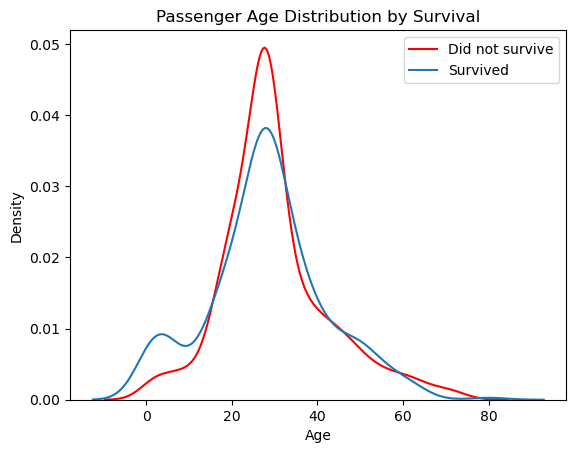

In [34]:
#Here using kdeplot plotting Survival vs Age relationship
sns.kdeplot(train['Age'][train['Survived'] == 0],color='red')
sns.kdeplot(train['Age'][train['Survived'] == 1])
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')
plt.legend(['Did not survive', 'Survived'])

Here the age group between 20 to 30 shows the highest number of onboarding while compared to other age groups. Therefore the number of death'sof passengers are also significantly higher while comparing with the infants and the seniors who have comparatively lower onboard leading to fewer deaths  (parapahse)

**Survival vs Gender**

In [35]:
#Here using bar-plot plotting Survival vs Sex relationship
palette= ["#006D2C","red"]
sns.barplot(x=train['Sex'], y=train['Survived'], palette=colors)

# add labels and title
plt.legend(['Male', 'Female'])
plt.title('Survival vs Gender')
plt.xlabel('Sex')
plt.ylabel('Survival Frequency')


Text(0, 0.5, 'Survival Frequency')

The survival rate of females is higher than men

**Survival vs Embarked wrt Pclass:**

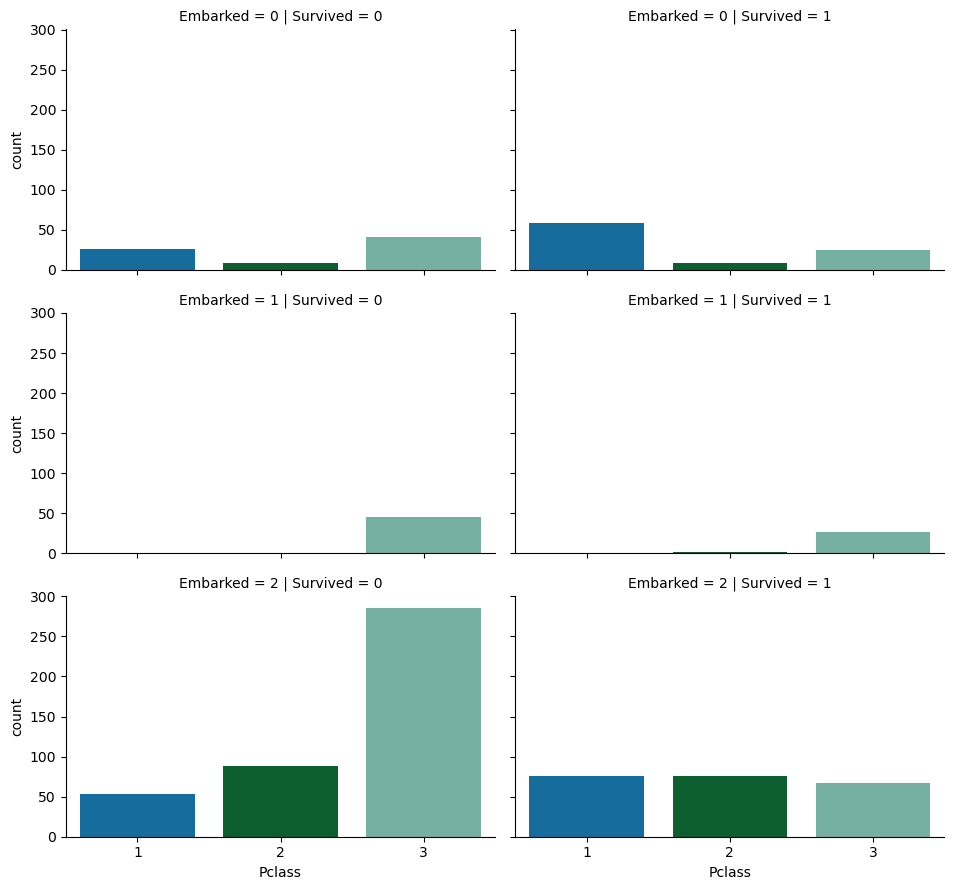

In [36]:
#Here using bar-plot plotting Survival vs Embarked with respect to Pclass relationship
grid = sns.FacetGrid(train, row='Embarked', col='Survived',  aspect=1.6)
colors = ["#0072B2","#006D2C","#6BBAA7"]
grid.map(sns.countplot, 'Pclass', order=[1,2,3], palette=colors)
grid.add_legend()
plt.show()

**Embarked:** 0 - Pclass 1 higher survival rate compared to Pclass3; 
1 - Pclass 3 has higher death rate; 
2 - higher death in Pclass 3.

Therefore concluded that socio-economic class (Ticket pricing) from each embarkment plays important role in survival with lesser rate of survival of Pclass 3 passengers.

**Survival vs Ticket Class**

Text(0.5, 1.0, 'Ticket Class vs Survival')

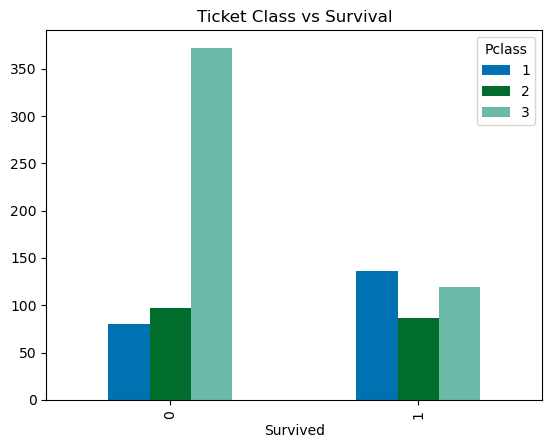

In [37]:
# Here we are plotting bar graph without stacking for analyse the Ticket Class vs Survival rate
train.groupby(['Survived', 'Pclass']).size().unstack().plot(kind='bar', stacked=False, color=colors)
plt.title('Ticket Class vs Survival')

**Survival vs Fare Distribution**

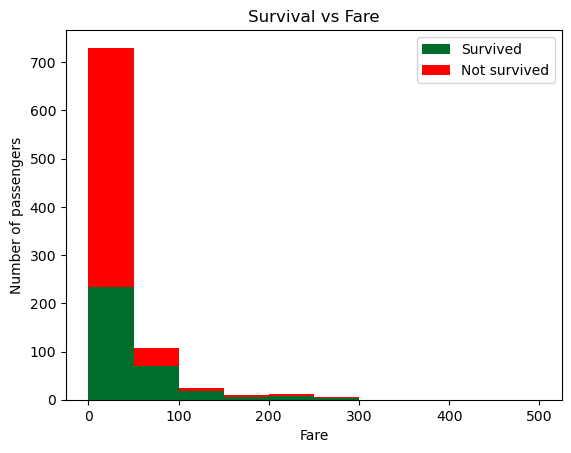

In [38]:
#Histogram chart to depict relation between survival rate and fare
# Divide the fare data into two groups based on survival
survived_fares = train[train['Survived'] == 1]['Fare']
not_survived_fares = train[train['Survived'] == 0]['Fare']

# Create a histogram of the two groups
bins = range(0, 550, 50)
plt.hist([survived_fares, not_survived_fares], bins=bins, stacked=True, color=["#006D2C","red"])

# Add labels and legend
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend(['Survived', 'Not survived'])
plt.title('Survival vs Fare')

# Show the plot
plt.show()

**Surival rate vs Ticket class/Fare:** Lower the socio-economic status higher the death rate

**Survival rate vs Family relationships(Parent-Child & Spouse-Sibling relation)**

Text(0, 0.5, 'Count')

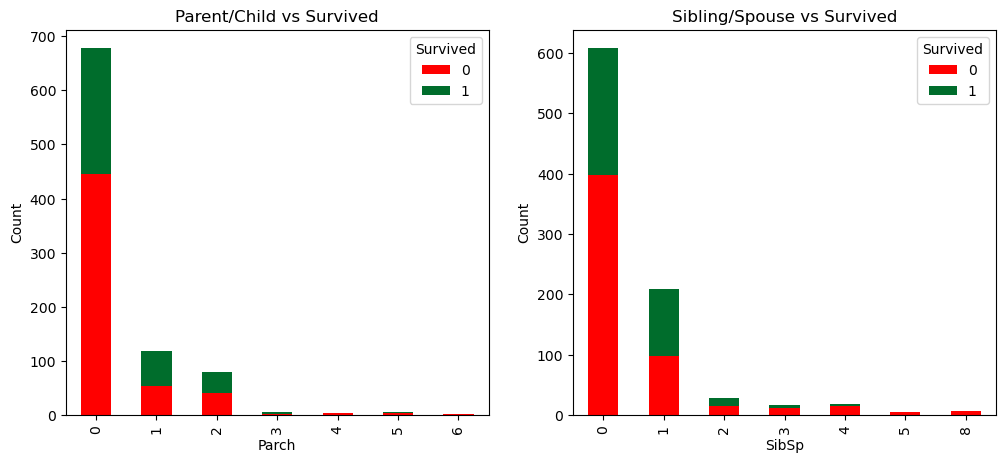

In [39]:
#Unstacked bar chart to depict relation between survival rate and Parent-Child & Spouse-Sibling relation
fig = plt.figure(figsize=(12,5))
plt.subplots_adjust(hspace=.5)

ax = plt.subplot2grid((1,2), (0,0))
train.groupby(['Parch', 'Survived']).size().unstack().plot(kind='bar', stacked=True, ax=ax, color=["red","#006D2C"])
plt.title('Parent/Child vs Survived')
plt.ylabel('Count')

ax = plt.subplot2grid((1,2), (0,1))
train.groupby(['SibSp', 'Survived']).size().unstack().plot(kind='bar', stacked=True, ax=ax , color=["red","#006D2C"])
plt.title('Sibling/Spouse vs Survived')
plt.ylabel('Count')

The mortality rate of the passengers travelling alone is higher than those travelling with 1 or more family members

**6.2 Using Pivot Table Analysing Data**

A pivot table is a tool for summarizing data that is utilized for rapid analysis, sorting, and organization of substantial amounts of data. It is effective in summarizing and reorganizing data in diverse manners, including computing averages, counting entries, and totaling values.

In [40]:
table =pd.pivot_table(train,index=['Sex','Survived','Pclass'],columns=['Embarked'],values=['Age'],aggfunc=np.mean)
table
# table.plot(kind='bar');

Age                      
Embarked                     0          1          2
Sex Survived Pclass                                 
0   0        1       50.000000        NaN  13.500000
             2             NaN        NaN  36.000000
             3       23.437500  28.055556  24.472727
    1        1       34.761905  33.000000  33.833333
             2       19.142857  29.000000  29.073770
             3       15.566667  25.833333  22.878788
1   0        1       40.040000  44.000000  41.617647
             2       29.312500  57.000000  33.018293
             3       27.757576  28.027778  27.337662
    1        1       35.941176        NaN  34.961429
             2       14.500000        NaN  17.822000
             3       21.342000  28.333333  23.529412

# 8. Feature Extraction

**8.1 Feature Selection using Correlation Matrix**

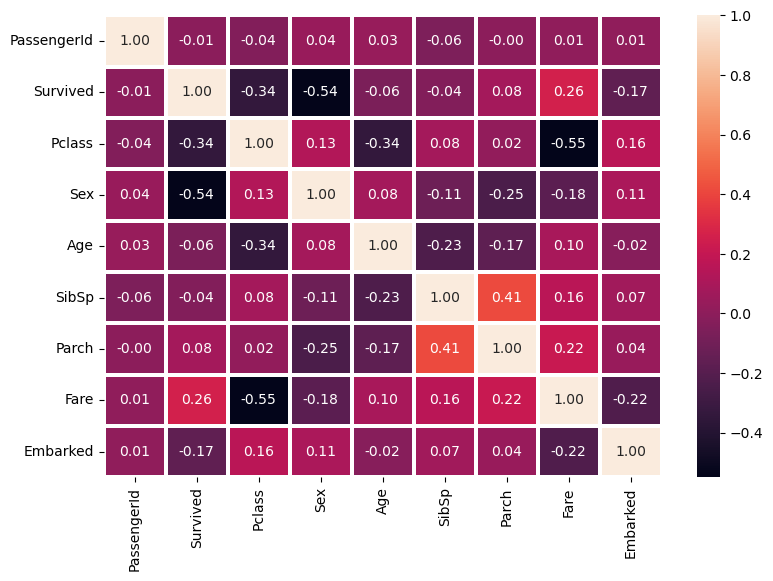

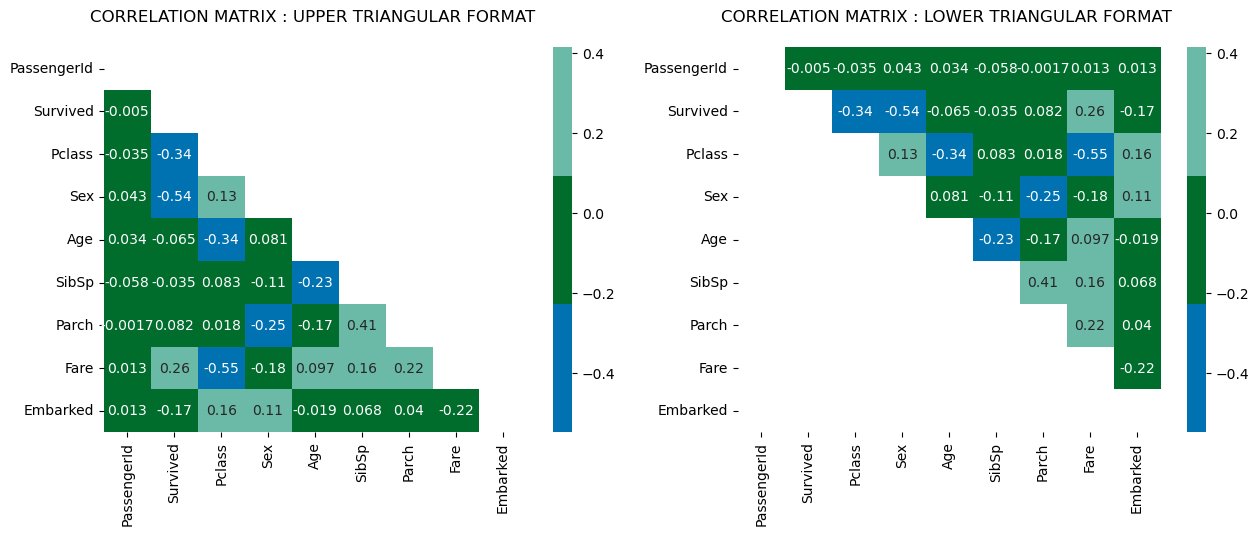

In [41]:
#Plot the complete correlation matrix
corr = train.corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot=True, linewidths=1.5, fmt='.2f', ax=ax)
plt.show()

# for ease of understanding the correlation matrix diving into upper triangle and lower triangle
ut = np.triu(corr)
lt = np.tril(corr)
fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(train.corr(),cmap = colors,annot = True,cbar = 'True',mask = ut)
#sns.heatmap(corr, annot=True, linewidths=1.5, fmt='.2f',mask = ut)
plt.title('CORRELATION MATRIX : UPPER TRIANGULAR FORMAT \n');
plt.subplot(1,2,2)
sns.heatmap(train.corr(),cmap = colors,annot = True,cbar = 'True',mask = lt)
plt.title('CORRELATION MATRIX : LOWER TRIANGULAR FORMAT \n');

* Selecting features such as Parch and Siblings since they are showing higher correlation.
* Extracting Age parameter to get more detailed information for Survival Prediction

**8.2 Extracting from Sibsp and Parch - Adding Has_Sibling_Spouse and Has_Parent_Child feature**

In [42]:
# Create binary features that indicate whether a passenger had a sibling/spouse or parent/child onboard
train['Has_Sibling_Spouse'] = (train['SibSp'] > 0).astype(int)
train['Has_Parent_Child'] = (train['Parch'] > 0).astype(int)

test['Has_Sibling_Spouse'] = (test['SibSp'] > 0).astype(int)
test['Has_Parent_Child'] = (test['Parch'] > 0).astype(int)

# Print the first few rows of the new dataset including Has_Sibling_Spouse and Has_Parent_Child
print("TRAIN DATASET\n",train.head())  
print("\nTEST DATASET\n",test.head()) 

TRAIN DATASET
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

      Fare  Embarked  Has_Sibling_Spouse  Has_Parent_Child  
0   7.2500         2                   1                 0  
1  71.2833         0                   1                 0  
2   7.9250         2                   0                 0  
3  53.1000         2                 

**8.3 Extracting from Age - Adding Age_Group**

In [43]:
# Create age bins
bins = [0,3, 12, 13, 20, 30, 60, 100]
labels = ['Infant','Toddler','Child', 'Teenager', 'Young Adult', 'Middle-Aged Adult', 'Senior']
train['Age_Group'] = pd.cut(train['Age'], bins=bins, labels=labels)
test['Age_Group'] = pd.cut(test['Age'], bins=bins, labels=labels)
print("AGE GROUPS FOR TRAIN DATASET \n",train['Age_Group'])
print("\nAGE GROUPS FOR TEST DATASET\n",test['Age_Group'])

AGE GROUPS FOR TRAIN DATASET 
 0            Young Adult
1      Middle-Aged Adult
2            Young Adult
3      Middle-Aged Adult
4      Middle-Aged Adult
             ...        
886          Young Adult
887             Teenager
888          Young Adult
889          Young Adult
890    Middle-Aged Adult
Name: Age_Group, Length: 891, dtype: category
Categories (7, object): ['Infant' < 'Toddler' < 'Child' < 'Teenager' < 'Young Adult' < 'Middle-Aged Adult' < 'Senior']

AGE GROUPS FOR TEST DATASET
 0      Middle-Aged Adult
1      Middle-Aged Adult
2                 Senior
3            Young Adult
4            Young Adult
             ...        
413          Young Adult
414    Middle-Aged Adult
415    Middle-Aged Adult
416          Young Adult
417          Young Adult
Name: Age_Group, Length: 418, dtype: category
Categories (7, object): ['Infant' < 'Toddler' < 'Child' < 'Teenager' < 'Young Adult' < 'Middle-Aged Adult' < 'Senior']


In [44]:
#converting categorical to numberic value
train['Age_Group'] = pd.factorize(train['Age_Group'])[0]
test['Age_Group'] = pd.factorize(test['Age_Group'])[0]
train = train.rename(columns={'Age_Group': 'Age_Group'})
print("TABLE WITH AGE GROUPS FOR TRAIN DATASET \n",train.head())
print("\nTABLE WITH AGE GROUPS FOR TEST DATASET\n",test.head())

TABLE WITH AGE GROUPS FOR TRAIN DATASET 
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

      Fare  Embarked  Has_Sibling_Spouse  Has_Parent_Child  Age_Group  
0   7.2500         2                   1                 0          0  
1  71.2833         0                   1                 0          1  
2   7.9250         2                  

**8.4 Extracting from Age_Group from Age**

The maximum family size in the train dataset is 15


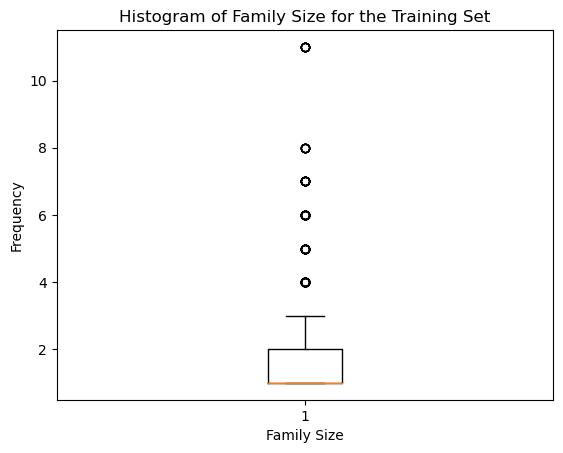

In [45]:
# Create a new feature that represents the total number of family members onboard
train['Family_Size'] = train['SibSp'] + train['Parch'] + 1
test['Family_Size'] = test['SibSp'] + test['Parch'] + 1
max_family_size_train = train['SibSp'].max() + train['Parch'].max() + 1
max_family_size_test = test['SibSp'].max() + test['Parch'].max() + 1
print("The maximum family size in the train dataset is", max_family_size_train)


# Plot a histogram of the "Family_Size" feature for the training set
plt.boxplot(train['Family_Size'])



# Set the x- and y-axis labels and the title of the chart
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.title('Histogram of Family Size for the Training Set')
plt.show()

The maximum family size in the test dataset is 18


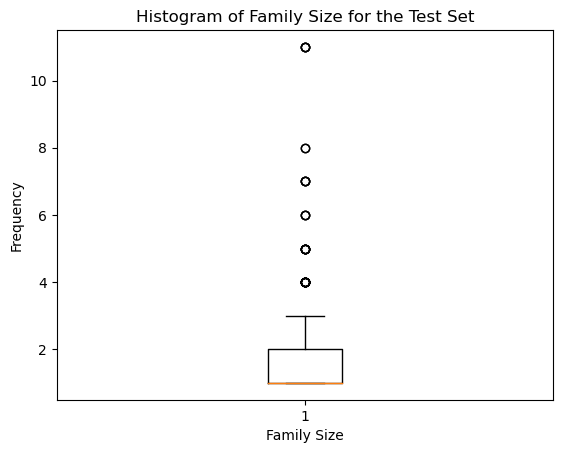

In [46]:
print("The maximum family size in the test dataset is", max_family_size_test)
# Plot a histogram of the "Family_Size" feature for the test set
plt.boxplot(test['Family_Size'])

# Set the x- and y-axis labels and the title of the chart
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.title('Histogram of Family Size for the Test Set')
plt.show()

In [47]:
print("TABLE WITH AGE GROUPS FOR TRAIN DATASET\n",train.head())
print("\nTABLE WITH AGE GROUPS FOR TEST DATASET\n",test.head())

TABLE WITH AGE GROUPS FOR TRAIN DATASET
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

      Fare  Embarked  Has_Sibling_Spouse  Has_Parent_Child  Age_Group  \
0   7.2500         2                   1                 0          0   
1  71.2833         0                   1                 0          1   
2   7.9250         2                

# 9.Apply clustering and classification models

**Split training data**

In [48]:
#Deleting columns
test.drop('Name', axis = 1,inplace=True)
train.drop('Name', axis = 1,inplace=True)

In [49]:
# Separate the dependent variable (Survived) from the independent variables
X = train.drop('Survived', axis=1)
y = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Table X_train: \n",X_train)
print("Table y_train: \n", X_test)
print("Table X_test: \n", y_train)
print("Table Y_test: \n",y_test)

Table X_train: 
      PassengerId  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked  \
331          332       1    1  45.5      0      0   28.5000         2   
733          734       2    1  23.0      0      0   13.0000         2   
382          383       3    1  32.0      0      0    7.9250         2   
704          705       3    1  26.0      1      0    7.8542         2   
813          814       3    0   6.0      4      2   31.2750         2   
..           ...     ...  ...   ...    ...    ...       ...       ...   
106          107       3    0  21.0      0      0    7.6500         2   
270          271       1    1  28.0      0      0   31.0000         2   
860          861       3    1  41.0      2      0   14.1083         2   
435          436       1    0  14.0      1      2  120.0000         2   
102          103       1    1  21.0      0      1   77.2875         2   

     Has_Sibling_Spouse  Has_Parent_Child  Age_Group  Family_Size  
331                   0               

**9.1 Clustering Model**

**9.1.1 K-Means CLustering**

https://www.kaggle.com/code/dejavu23/titanic-eda-to-ml-beginner  ---> reference 

NameError: name 'silhouette_scores' is not defined

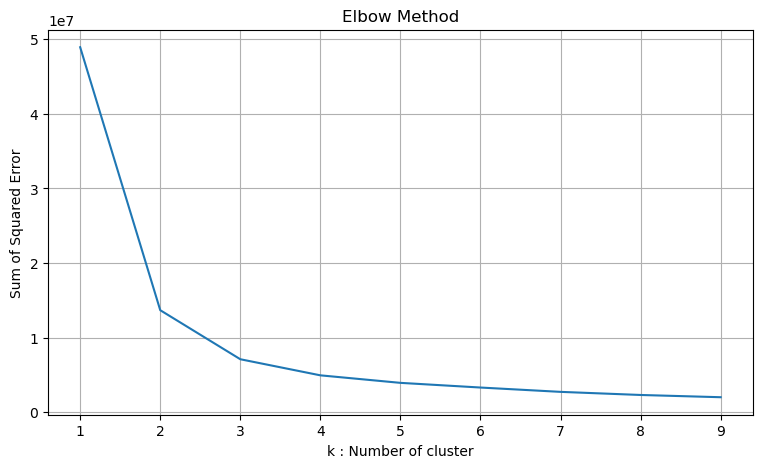

In [50]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
sse = {};kmax = 10
fig = plt.subplots(nrows = 1, ncols = 1, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_train, y_train)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

The Silhouette score for Kmeans is : 70.7


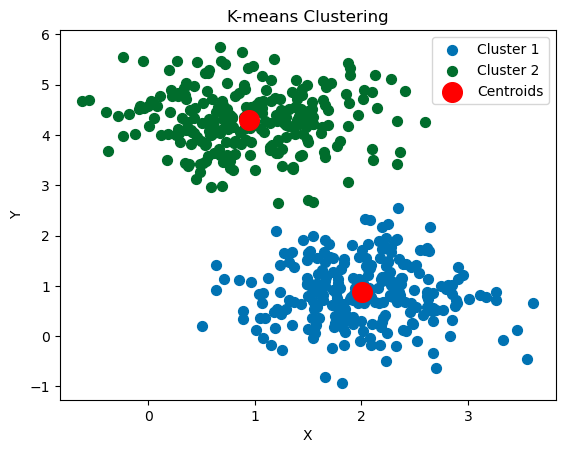

In [51]:
#Taking optimal value of k =2
# Generate random blobs
X, y = make_blobs(n_samples=500, centers=2, cluster_std=0.6, random_state=0)
# Perform K-means clustering with optimal number of clusters (in this case, 2)
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

sil=round(silhouette_score(X,kmeans.labels_)*100,2)
print("The Silhouette score for Kmeans is :",sil)
# Plot the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c='#0072B2', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c='#006D2C', label='Cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()



In [54]:
#Making moon plot
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Plot the results
colors = np.array(["#0072B2","#006D2C"])
plt.scatter(X[:, 0], X[:, 1], c=colors[kmeans.labels_], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.legend()
plt.show()

**Hierarchical Clustering**

In [65]:
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
titanic_scaled = scaler.fit_transform(X)

# Compute silhouette scores for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = clustering.fit_predict(titanic_scaled)
    s= silhouette_scores.append(silhouette_score(titanic_scaled, labels))
    print(s)


None
None
None
None
None
None
None
None
None


In [69]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage

Silhouette score: 45.72


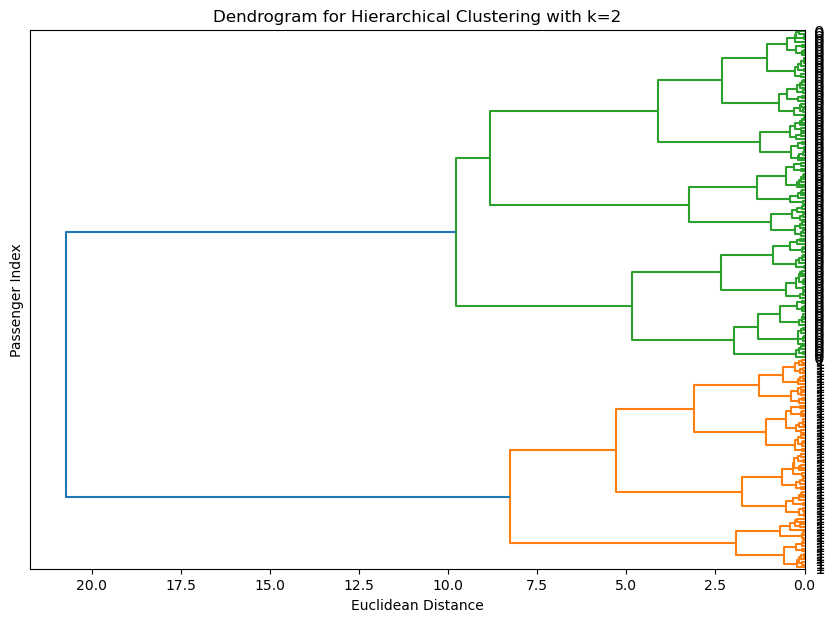

In [71]:
# Standardize the data
scaler = StandardScaler()
titanic_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering with k=2
clustering = AgglomerativeClustering(n_clusters=2)
labels = clustering.fit_predict(titanic_scaled)

# Compute the silhouette score
silhouette = round(silhouette_score(titanic_scaled, labels) * 100, 2)
print('Silhouette score:', silhouette)


In [70]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram = dendrogram(
    linkage(titanic_scaled, method='ward'),
    leaf_font_size=12,
    orientation='left',
    labels=labels
)
plt.title('Dendrogram for Hierarchical Clustering with k=2')
plt.ylabel('Passenger Index')
plt.xlabel('Euclidean Distance')
plt.show()

array([[ 0.36748451,  0.54576641],
       [ 1.28731953, -1.2803031 ],
       [-0.59397643,  0.04357482],
       [-1.74182239, -0.66371706],
       [ 1.45705144, -0.85667812],
       [ 1.58953574, -0.59675854],
       [ 0.54875768, -0.08552893],
       [ 0.44914675, -1.50218876],
       [ 0.46138047,  0.23124986],
       [ 0.71117525, -1.59382202],
       [-0.98693652,  1.16613579],
       [-0.28618307, -0.9941549 ],
       [ 1.51445888, -0.7760272 ],
       [ 0.82589866, -1.33505302],
       [-1.51451022,  0.79027655],
       [ 0.55545785, -0.08853775],
       [ 0.05104108,  1.284163  ],
       [-0.17030547, -1.12065006],
       [-0.1659644 ,  1.28843594],
       [-1.46106881,  1.15527198],
       [ 1.63987535, -0.48630812],
       [ 0.41814803, -1.47618916],
       [-0.34023715,  1.50810931],
       [ 0.90980627, -1.26183242],
       [-0.88905065,  1.56616629],
       [-0.29208555, -0.66541512],
       [ 1.55266276, -0.70888274],
       [ 1.59187607, -0.4198694 ],
       [-0.37934026,

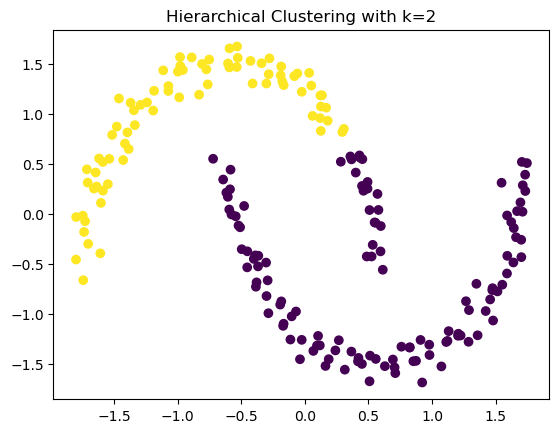

In [68]:
# Plot the scatter plot with different colors for each cluster
plt.scatter(titanic_scaled[:, 0], titanic_scaled[:, 1], c=labels)
plt.title('Hierarchical Clustering with k=2')
plt.show()


Silhouette score: 38.24
Number of clusters: 2
Number of outliers: 0


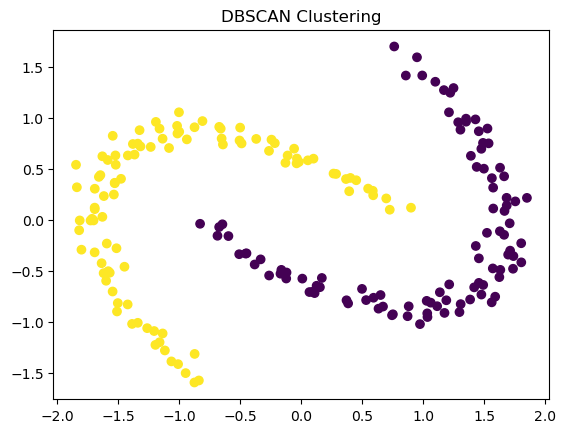

In [73]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Standardize the data
scaler = StandardScaler()
titanic_scaled = scaler.fit_transform(X)

# Perform DBSCAN clustering
clustering = DBSCAN(eps=0.5, min_samples=5)
labels = clustering.fit_predict(titanic_scaled)

# Compute the silhouette score
silhouette_score = round(silhouette_score(titanic_scaled, labels)*100,2)
print('Silhouette score:', silhouette_score)

# Print the number of clusters and number of outliers
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print('Number of clusters:', n_clusters)
print('Number of outliers:', n_noise)

# Reduce the dimensionality of the data to 2 dimensions using PCA
pca = PCA(n_components=2)
titanic_pca = pca.fit_transform(titanic_scaled)

# Plot the scatter plot with different colors for each cluster
plt.scatter(titanic_pca[:, 0], titanic_pca[:, 1], c=labels)
plt.title('DBSCAN Clustering')
plt.show()

70 to above for classiferers are good.

Classifers

For comparison of the results we use these metrics:
accuracy_score, classification_report, confusion_matrix

**9.2 Classifiers**

**9.2.1.Logistic regression**

In [ ]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train,y_train)
pred_logreg = logreg.predict(X_test)
cm = confusion_matrix(y_test, pred_logreg)
logreg_ac=round(accuracy_score(y_test, pred_logreg) * 100,2)
print("Accuracy score for Logistic Regression :",logreg_ac)
print("Recall for Logistic Regression :",round(recall_score(y_test, pred_logreg) * 100,2))
print("F1 score for Logistic Regression :",round(f1_score(y_test, pred_logreg) * 100,2))
print("\nClassification Report for Logistic Regression : \n",classification_report(y_test, pred_logreg))
print("Confusion Matrix for Logistic Regression :\n",cm)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix Plot")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**9.2.2 Support vector machines**

In [ ]:
svc = SVC(max_iter=1000)
svc.fit(X_train, y_train)
svm_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, svm_pred)
svm_ac=round(accuracy_score(y_test, svm_pred) * 100,2)
print("Accuracy score for Support vector Machines:",svm_ac)
print("Recall for Support vector Machines:",round(recall_score(y_test, svm_pred) * 100,2))
print("F1 score for Support vector Machines:",round(f1_score(y_test, svm_pred) * 100,2))
print("\nClassification Report Support vector Machines: \n",classification_report(y_test, svm_pred))
print("Confusion Matrix for Support vector Machines: \n",cm)
#plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix Plot")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**9.2.3. K-Nearest neighbours (KNN)**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
cm = confusion_matrix(y_test, pred_knn)
knn_ac=round(accuracy_score(y_test, pred_knn) * 100,2)
print("Accuracy score for  K-Nearest Neghbours:",knn_ac)
print("Recall for K-Nearest Neghbours:",round(recall_score(y_test, pred_knn) * 100,2))
print("F1 score for  K-Nearest Neghbours:",round(f1_score(y_test, pred_knn) * 100,2))
print("\nClassification Report for K-Nearest Neghbours: \n",classification_report(y_test, pred_knn))
print("Confusion Matrix for K-Nearest Neghbours: \n",cm)
#plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix Plot")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**9.2.4. Gaussian naive bayes**

In [ ]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
pred_gnb = gnb.predict(X_test)
pred_gnb
cm = confusion_matrix(y_test, pred_gnb)
gnb_ac=round(accuracy_score(y_test, pred_gnb) * 100,2)
print("Accuracy score for Gaussian naive bayes:",gnb_ac)
print("Recall for Gaussian naive bayes:",round(recall_score(y_test, pred_gnb) * 100,2))
print("F1 score for  Gaussian naive bayes:",round(f1_score(y_test, pred_gnb) * 100,2))
print("\nClassification Report for Gaussian naive bayes: \n",classification_report(y_test, pred_gnb))
print("Confusion Matrix for Gaussian naive bayes: \n",cm)
#plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix Plot")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**9.2.5. Perceptron**

In [ ]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
per_pred = perceptron.predict(X_test)
cm = confusion_matrix(y_test, per_pred)
per_ac=round(accuracy_score(y_test, per_pred) * 100,2)
print("Accuracy score for Perceptron:",per_ac)
print("Recall for Perceptron:",round(recall_score(y_test, per_pred) * 100,2))
print("F1 score for Perceptron:",round(f1_score(y_test, per_pred) * 100,2))
print("\nClassification Report for Perceptron: \n",classification_report(y_test, per_pred))
print("Confusion Matrix for Perceptron: \n",cm)
#plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix Plot")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**9.2.6. Linear SVC**

In [ ]:
linear_svc = svm.LinearSVC(dual=False)
linear_svc.fit(X_train, y_train)
lsvc_pred = linear_svc.predict(X_test)

lsvc_ac=round(accuracy_score(y_test, lsvc_pred) * 100,2)
print("Accuracy score for Linear SVC:",lsvc_ac)
print("Recall for Linear SVC:",round(recall_score(y_test, lsvc_pred) * 100,2))
print("F1 score for Linear SVC:",round(f1_score(y_test, lsvc_pred) * 100,2))
print("\nClassification Report for Linear SVC: \n",classification_report(y_test, lsvc_pred))
print("Confusion Matrix for Linear SVC: \n",cm)
#plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix Plot")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**9.2.7. Stochastic gradient descent**

In [ ]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)
cm = confusion_matrix(y_test, sgd_pred)

sgd_ac=round(accuracy_score(y_test, sgd_pred) * 100,2)
print("Accuracy score for Stochastic gradient descent:",sgd_ac)
print("Recall for Stochastic gradient descent:",round(recall_score(y_test, sgd_pred) * 100,2))
print("F1 score for Stochastic gradient descent:",round(f1_score(y_test, sgd_pred) * 100,2))
print("\nClassification Report for Stochastic gradient descent: \n",classification_report(y_test, sgd_pred))
print("Confusion Matrix for Stochastic gradient descent: \n",cm)
#plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix Plot")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

 **9.2.8. Decision tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred_dtree = dtree.predict(X_test)
cm = confusion_matrix(y_test, pred_dtree)
dt_ac=round(accuracy_score(y_test, pred_dtree) * 100,2)
print("Accuracy score for DecisionTree:",dt_ac)
print("Recall for DecisionTree:",round(recall_score(y_test, pred_dtree) * 100,2))
print("F1 score for DecisionTree:",round(f1_score(y_test, pred_dtree) * 100,2))
print("\nClassification Report for DecisionTree: \n",classification_report(y_test, pred_dtree))
print("Confusion Matrix for DecisionTree: \n",cm)
#plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix Plot")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**9.2.9.Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6, max_features=7)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
cm = confusion_matrix(y_test, pred_rfc)
rfc_ac=round(accuracy_score(y_test, pred_rfc) * 100,2)
print("Accuracy score for Random Forest:",rfc_ac)
print("Recall for Random Forest:",round(recall_score(y_test, pred_rfc) * 100,2))
print("F1 score for Random Forest:",round(f1_score(y_test, pred_rfc) * 100,2))
print("\nClassification Report for Random Forest: \n",classification_report(y_test, pred_rfc))
print("Confusion Matrix for Random Forest: \n",cm)

#plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix Plot")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**9.2.10. CatBoost**

In [ ]:
catboost = CatBoostClassifier()
catboost.fit(X_train, y_train)
cat_pred = catboost.predict(X_test)
cm = confusion_matrix(y_test, cat_pred)
cat_ac=round(accuracy_score(y_test, cat_pred) * 100,2)
print("Accuracy score for CatBoost:",cat_ac)
print("Recall for CatBoost:",round(recall_score(y_test, cat_pred) * 100,2))
print("F1 score for CatBoost:",round(f1_score(y_test, cat_pred) * 100,2))
print("\nClassification Report for CatBoost: \n",classification_report(y_test, cat_pred))
print("Confusion Matrix for CatBoost: \n",cm)

#plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix Plot")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


**9.2.11 GradientBoosting**

In [ ]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit classifier to training data
gbm.fit(X_train, y_train)

# Make predictions on testing data
y_pred = gbm.predict(X_test)

# Evaluate classifier performance
cm = confusion_matrix(y_test, y_pred)
gbm_ac=round(accuracy_score(y_test, y_pred) * 100,2)
print("Accuracy score for DecisionTree:",gbm_ac)
print("Recall for DecisionTree:",round(recall_score(y_test, y_pred) * 100,2))
print("F1 score for DecisionTree:",round(f1_score(y_test, y_pred) * 100,2))
print("\nClassification Report for DecisionTree: \n",classification_report(y_test, y_pred))
print("Confusion Matrix for DecisionTree: \n",cm)
#plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix Plot")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Clustering** is an unsupervised machine learning method of identifying and grouping similar data points in larger datasets without concern for the specific outcome. Clustering (sometimes called cluster analysis) is usually used to classify data into structures that are more easily understood and manipulated.

https://www.kaggle.com/code/tanmay111999/clustering-pca-k-means-dbscan-hierarchical#Modeling

# 9.Experimental Analysis Result

**Model evaluation**
Training accuracy shows how well our model has learned from the training set.

**9.1 Training accuracy**


In [ ]:
# Training accuracy shows how well our model has learned from the training set. 
models = pd.DataFrame({
    'Model': [
        'Logistic regression',
        'Support vector machines',
        'K-Nearest neighbours (KNN)',
        'Gaussian naive bayes',
        'Perceptron',
        'Linear SVC',
        'Stochastic Gradient Descent',
        'Decision Tree',
        'Random Forest',
        'CatBoost',
        'GradientBoosting'
    ],
    'Score': [
        logreg_ac, svm_ac, knn_ac, gnb_ac,per_ac,lsvc_ac,sgd_ac,dt_ac,rfc_ac, cat_ac ,gbm_ac
    ]
})
models['Score'] = [x.ravel()[0] if type(x) == np.ndarray else x for x in models['Score']]
models = models.sort_values(by='Score', ascending=False, ignore_index=True)
models

**9.2 K-fold cross validation**

It is important to not get too carried away with models with impressive training accuracy as what we should focus on instead is the model's ability to predict out-of-samples data, in other words, data our model has not seen before.

This is where k-fold cross validation comes in. K-fold cross validation is a technique whereby a subset of our training set is kept aside and will act as holdout set for testing purposes. Here is a great [video](https://www.youtube.com/watch?v=fSytzGwwBVw) explaining the concept in more detail. 

In [ ]:
# Create a list which contains classifiers 

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())
classifiers.append(GradientBoostingClassifier())

len(classifiers)

In [ ]:
# Create a list which contains cross validation results for each classifier
from sklearn.model_selection import cross_val_score
cv_results = []


for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y_train, scoring = 'accuracy', cv = 10))

In [ ]:
# Mean and standard deviation of cross validation results for each classifier  

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [ ]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost','GradientBoosting']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

**9.3 Feature Data change**


In [1]:
# sns.barplot('Cross Validation Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
# plt.ylabel('Algorithm')
# plt.title('Cross Validation Scores')

import seaborn as sns
import matplotlib.pyplot as plt

# assume cv_res and cv_std are already defined

# sort cv_res by 'Cross Validation Mean'
cv_res_sorted = cv_res.sort_values(by='Cross Validation Mean', ascending=False)

# plot the barplot
sns.barplot(x='Cross Validation Mean', y='Algorithm', data=cv_res_sorted, order=cv_res_sorted['Algorithm'], palette='Set3', xerr=cv_std)

plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')


NameError: name 'cv_res' is not defined

Gradient Boosting has the highest cross validation mean and thus we will proceed with this model.

https://www.kaggle.com/code/junyjohn/titanic-workout/edit
    
    

# Experimental results analysis


# 8. Possible extensions to improve model accuracy

1. Analyse ticket and cabin features
    - Do these features help predict passenger survival?
    - If yes, consider including them in the training set instead of dropping
2. Come up with alternative features in feature engineering
    - Is there any other features you can potentially create from existing features in the dataset
3. Remove features that are less important
    - Does removing features help reduce overfitting in the model?
4. Ensemble modelling
    - This is a more advanced technique whereby you combine prediction results from multiple machine learning models

K-Means Clustering, Hierarchical Clustering and DBSCAN Clustering are fundamentally different. They are based on different principles, thus displaying the difference in the model performances. Overall the model performances are not as great.


In [ ]:
https://www.kaggle.com/code/startupsci/titanic-data-science-solutions